In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
ordinal = ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal.shape

(2580, 81)

In [5]:
ordinal = ordinal.assign(Log10 = np.log10(ordinal.SalePrice.values))
ordinal.shape 

(2580, 82)

In [6]:
ordinal = ordinal.drop(['SalePrice'], axis=1)
ordinal.shape

(2580, 81)

In [7]:
cols = ordinal.columns
cols

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
  

In [8]:
len(cols)

81

In [9]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,5.100371
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,5.144574
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,5.096562


In [10]:
X = ordinal.drop(['Log10'], axis=1).values
y = ordinal.Log10.values

In [11]:
y

array([5.10037055, 5.14457421, 5.09656244, ..., 5.161368  , 5.33745926,
       5.33243846])

In [12]:
X.shape

(2580, 80)

In [13]:
Ridge = Ridge()

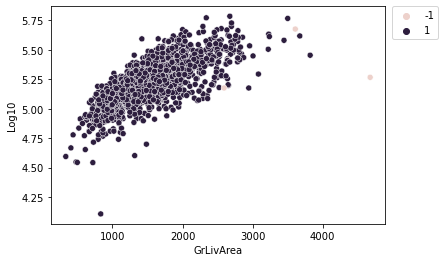

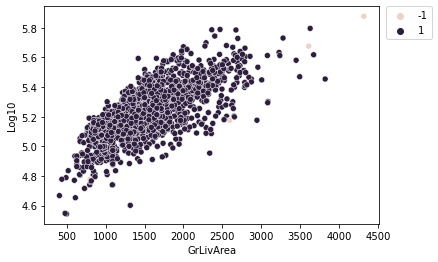

In [14]:
Ridge_R2 = []
GBM_R2 = []
GBM_AR2 = []
GBM_MAE = []

for i in range(2):

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    #print(X_train)
    #print(X_train.shape)
    #print()
    #print(X_test)
    #print(X_test.shape)
    #print()
    #print(Y_train)
    #print(Y_train.shape)
    #print()
    #print(Y_test)
    #print(Y_test.shape)
    
    ##Combine X_train and Y_train to create a "Train DataFrame"
    train = pd.DataFrame(np.hstack((X_train, Y_train.reshape(-1,1))),
                         index=X_train[:,0], columns=cols).drop(['Unnamed: 0'], axis=1)
    
    ##Input Values from Train DataFrame for unsupervised outlier detection with IF
    Train_Values = train.values
    
    scaler_train = preprocessing.StandardScaler().fit(Train_Values)
    Train_Values_Scaled = scaler_train.transform(Train_Values)
    
    
    iso = IsolationForest(n_estimators=1000, max_samples=750, contamination=0.0016)
    results = iso.fit_predict(Train_Values_Scaled)
    
    ##Add Outlier Detection Results to Train DataFrame, Create Scatterplot of Train Set
    train = train.assign(Outlier = results)
    
    plt.figure()
    sns.scatterplot(data=train, x='GrLivArea', y='Log10', hue='Outlier')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    ##Obtain Index Values of Outliers from Train DataFrame
    outs = train[train.Outlier==-1]
    drop_index = outs.index
    #print(drop_index)
    #print(len(outs))
    
    ##Run Ridge Regression on Training Data (X=X_train, Y=Log10)
    base = pd.read_csv('../../Data/BaseData.csv')
    base = base.assign(Log10 = np.log10(base.SalePrice.values))
    base = base.drop(['SalePrice', 'PID', 'Unnamed: 0.1'], axis=1)
    base = base.drop(drop_index, axis=0)
    X_ridge = base.drop(['Log10'], axis=1)
    y_ridge = base.Log10.values
    
    #base_drop_outs = base.drop(drop_index, axis=0)
    #X_ridge = base_drop_outs.drop(['Log10'], axis=1)
    #y_ridge = base_drop_outs.Log10.values
    
    scaler_ridge_X = preprocessing.StandardScaler().fit(X_ridge)
    scaled_ridge_X = scaler_ridge_X.transform(X_ridge)
    
    #scaler_ridge_Y = preprocessing.StandardScaler().fit(y_ridge.reshape(-1,1))
    #scaled_ridge_Y = scaler_ridge_X.transform(y_ridge)
    
    Ridge.fit(scaled_ridge_X, y_ridge)
    Ridge_Score = Ridge.score(scaled_ridge_X, y_ridge)
    Ridge_Results = Ridge.predict(scaled_ridge_X)
    Ridge_R2.append(Ridge_Score)
    
    #print(Score)
    #USD = 10**Ridge_Results
    
    #print(USD)
    #print(len(USD))
    
    base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
    base_ordinal = base_ordinal.assign(Log10 = np.log10(base_ordinal.SalePrice.values))
    base_ordinal = base_ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
    
    base_ordinal = base_ordinal.drop(drop_index, axis=0)
    base_ordinal = base_ordinal.assign(Ridge = 10**Ridge_Results)
    
    keep_index = train.index
    X_train = base_ordinal[base_ordinal.index.isin(keep_index)].drop(['SalePrice', 'Log10'], axis=1)
    X_test = base_ordinal[~base_ordinal.index.isin(keep_index)].drop(['SalePrice', 'Log10'], axis=1)
    Y_train = base_ordinal[base_ordinal.index.isin(keep_index)].SalePrice.values
    Y_test = base_ordinal[~base_ordinal.index.isin(keep_index)].SalePrice.values
    
    #X_ordinal = base_ordinal.drop(['SalePrice'], axis=1).values
    #Y_ordinal = base_ordinal.SalePrice.values
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    GBM_R2.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
    GBM_AR2.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    GBM_MAE.append(mae)

In [15]:
Results = pd.DataFrame({'Ridge R2': Ridge_R2, 'GBM_R2': GBM_R2, 'GBM_AR2': GBM_AR2,
                        'GBM MAE':GBM_MAE})
#Results

In [16]:
Results.describe()

,Ridge R2,GBM_R2,GBM_AR2,GBM MAE
count,2.000000,2.000000,2.000000,2.000000
mean,0.944686,0.937352,0.928339,10445.408613
std,0.003333,0.027950,0.031971,220.824826
min,0.942330,0.917589,0.905732,10289.261881
25%,0.943508,0.927471,0.917036,10367.335247
50%,0.944686,0.937352,0.928339,10445.408613
75%,0.945865,0.947234,0.939643,10523.481979
max,0.947043,0.957116,0.950946,10601.555345


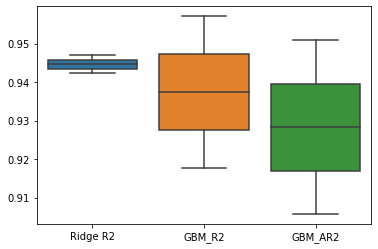

In [17]:
sns.boxplot(data=Results[['Ridge R2','GBM_R2', 'GBM_AR2']]);

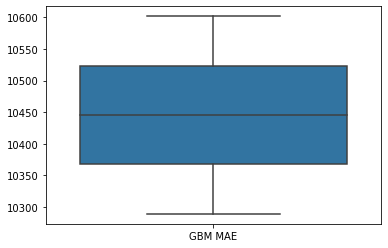

In [18]:
sns.boxplot(data=Results[['GBM MAE']]);

In [19]:
#base_ordinal

In [20]:
#X_train.shape[1]

In [21]:
#train

In [22]:
len(Ridge_Results)

2576